In [61]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import math
%matplotlib inline

# SI Model

In [102]:
beta = 0.8

t_start = 0
t_end = 15       # Transmit Time

N = 1000


I0 = 1      # Initial Number of Infected
S0 = N - I0    # Initial Number of Susceptible

INPUT = (S0, I0)

In [103]:
100*100*0.8/4

2000.0

In [104]:
%%latex
\begin{align}

\frac{dS(t)}{dt} = -\frac{\beta S(t)I(t)}{N} \\
S + I = N\\
I(0)=1\\

\\

equals  to\\

\\
\\
I = \frac{Ne^{\beta Nt}}{(N-1)+e^{\beta Nt}}\\

\\
t_m = \frac{ln(N-1)}{\beta}\\
\\
\\
-\frac{d^2 S}{dt^2} = 0\\
\\
\\
(-\frac{dS}{dt})_{max} = \frac{\beta N^2}{4}\\
\\
\\
S = \frac{N}{2}\\
\\
\\
(-\frac{dS}{dt})_{max} = \frac{\beta N}{4}\\
\\
\\

\frac{dS(t)}{dt} = -\frac{\beta S(t)I(t)}{N} \\

\frac{dI(t)}{dt} = \beta S(t)I(t) \\


\end{align}

<IPython.core.display.Latex object>

In [105]:
def model_SI(INP,t):  
    # Y 为微分方程组的3个以t为分母的导数
    Y=np.zeros((2))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N  
    Y[1] = beta * V[0] * V[1]/N
    return Y   # For odeint

In [106]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SI, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs


Text(0, 0.5, 'Susceptibles and Infecteds')

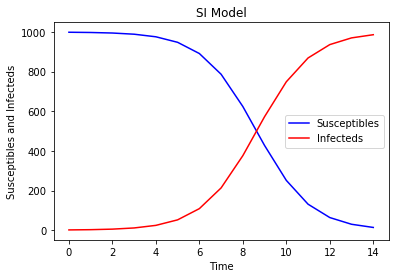

In [107]:
#Ploting
# pl.subplot(211)
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.legend(loc=0)
pl.title('SI Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles and Infecteds')

In [31]:
import math
math.log(1000-1)/(0.8)

8.633443473310692

In [9]:
100*math.pow(math.e, 80)/(99+math.pow(math.e, 80))

100.0

In [10]:
math.log(100-1)/(0.8*100/100)

5.743899812668237

# SIR Model

In [35]:
beta = 0.8
gamma = 0.14286

t_start = 0.0
t_end = 30       # Transmit Time

N = 1000
R0 = 0
I0 = 1      # Initial Number of Infectious
S0 = N - I0 - R0    # Initial Number of Susceptible

INPUT = (S0, I0, R0)

In [36]:
%%latex
\begin{equation}

\frac{dS(t)}{dt} = -\frac{\beta S(t)I(t)}{N} \\
\frac{dI(t)}{dt} = \frac{\beta S(t)I(t)}{N} - \gamma I(t) \\
\frac{dR(t)}{dt} = \gamma I(t)

\end{equation}

<IPython.core.display.Latex object>

In [37]:
def model_SIR(INP,t):  
    # 右侧为积分表达式
    Y = np.zeros((3))
    V = INP
    Y[0] = - beta * V[0] * V[1]/N                    # Y[0] is dS(t)/dt, V[0] is S(t)
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1]       # Y[1] is dI(t)/dt, V[1] is I(t)
    Y[2] = gamma * V[1]                            # Y[2] is dR(t)/dt.
    return Y   # For odeint

In [38]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SIR, INPUT, t_range)   # INPUT is the first parameter of func diff_eqs
                                             # t_range is the second parameter of func diff_eqs

Text(0, 0.5, 'Susceptibles, Infectious and Recovereds')

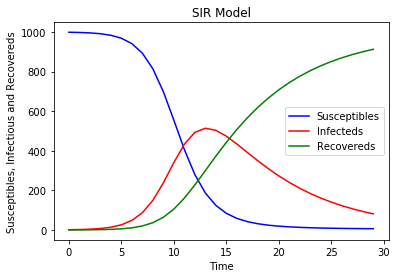

In [39]:
#Ploting
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], '-r', label='Infecteds')
pl.plot(RES[:,2], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('SIR Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles, Infectious and Recovereds')

# SEIR Model

In [53]:
beta = 1.2
gamma = 0.1

t_start = 0.0
t_end = 60       # Transmit Time
t_latent = 7    # Latent Period/Incubation Period

N = 1000

I0 = 3      # Initial Number of Infectious
E0 = 0
R0 = 0
S0 = N - I0 - E0 - R0    # Initial Number of Susceptible

INPUT = (S0, E0, I0, R0)

In [54]:
%%latex
\begin{equation}

\frac{dS}{dt} = -\frac{\beta SI}{N} \\
\frac{dE}{dt} = \frac{\beta SI}{N} - \frac{E}{T_{latent}} \\
\frac{dI}{dt} = \frac{E}{T_{latent}} - \gamma I \\
\frac{dR}{dt} = \gamma I \\
S + E + I + R = N

\end{equation}

<IPython.core.display.Latex object>

In [55]:
%%latex
\begin{equation}

\int_{-\infty}^{+\infty}\frac{dS}{dt} \cdot dt = \int_{-\infty}^{+\infty}-\frac{\beta SI}{N} \cdot dt \\
\int_{-\infty}^{+\infty}\frac{dE}{dt} \cdot dt = \int_{-\infty}^{+\infty}(\frac{\beta SI}{N} - \frac{E}{T_{latent}}) \cdot dt \\
\int_{-\infty}^{+\infty}\frac{dI}{dt} \cdot dt = \int_{-\infty}^{+\infty}(\frac{E}{T_{latent}} - \gamma I) \cdot dt \\
\int_{-\infty}^{+\infty}\frac{dR}{dt} \cdot dt = \int_{-\infty}^{+\infty}\gamma I \cdot dt \\
  

\end{equation}

<IPython.core.display.Latex object>

In [56]:
%%latex
\begin{equation}

S = \int-\frac{\beta SI}{N} \cdot dt \\
E = \int(\frac{\beta SI}{N} - \frac{E}{T_{latent}}) \cdot dt \\
I = \int(\frac{E}{T_{latent}} - \gamma I) \cdot dt \\
R = \int\gamma I \cdot dt \\
  

\end{equation}

<IPython.core.display.Latex object>

In [57]:
def model_SEIR(INP,t):  
    # 右侧为积分表达式
    Y= np.zeros((4))
    V = INP
    Y[0] = - beta * V[0] * V[2]/N    
    Y[1] = beta * V[0] * V[2]/N - V[1]/t_latent
    Y[2] = V[1]/t_latent - gamma * V[2]
    Y[3] = gamma * V[2]
    return Y   # For odeint

In [58]:
t_range = np.arange(t_start, t_end)

RES = spi.odeint(model_SEIR, INPUT, t_range)   
#对函数求积分

In [59]:
INPUT

(997, 0, 3, 0)

Text(0, 0.5, 'Susceptibles, Infectious and Recovereds')

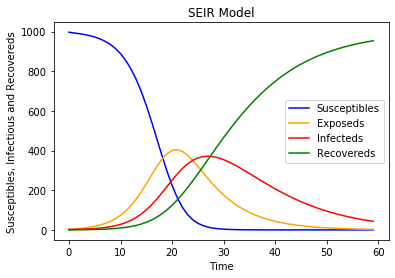

In [60]:
#Ploting
pl.plot(RES[:,0], '-b', label='Susceptibles')
pl.plot(RES[:,1], 'orange', label='Exposeds')
pl.plot(RES[:,2], '-r', label='Infecteds')
pl.plot(RES[:,3], '-g', label='Recovereds')

pl.legend(loc=0)
pl.title('SEIR Model')
pl.xlabel('Time')
pl.ylabel('Susceptibles, Infectious and Recovereds')